## 样本空间分析

### Python中的集合

Python中的集合

In [ ]:
# 关于Python的集合
# 集合（set）是一个无序的不重复元素序列。
# 可以使用大括号 { } 创建集合，元素之间用逗号 , 分隔， 或者也可以使用 set() 函数创建集合。
set_01 = {1, 2, 3, 4, 5}  # 创建集合set_01
set_02 = set([1, 1, 2, 3, 4, 5])  # 创建集合set_02

In [ ]:
set_01

{1, 2, 3, 4, 5}

In [ ]:
set_02  # 可以发现list中的重复元素被去除了

{1, 2, 3, 4, 5}

In [ ]:
type(set_01) # 查看一下类型

set

In [ ]:
# 如果是空集合，必须使用set()而不是{}，因为{}会创建字典
set_03 = set()
type(set_03)

set

In [ ]:
# 使用{}来进行创建
set_04 = {}
type(set_04)

dict

### 无偏差硬币

样本空间：一个欣慰的所有可能结果的集合（结果是可以被衡量的）。

In [ ]:
# 创建样本空间
sample_space = {"Heads", "Tails"}  # {}会创建一个集合set，无需不重复元素的集合

In [ ]:
# 样本空间 sample_space 中的每一个元素的可能性是一样的
probability_heads = 1 / len(sample_space)  # len() 给出长度，1表示100%，是所有的可能的结果的总和，这是公理
print(f"Probability of choosing heads is {probability_heads}")

Probability of choosing heads is 0.5


事件是sample_space中满足某些事件条件的那些元素的子集。

事件条件是一个简单的布尔函数，其输入是单个sanple_space元素，只有当元素满足条件约束的时候，该函数才会返回True。

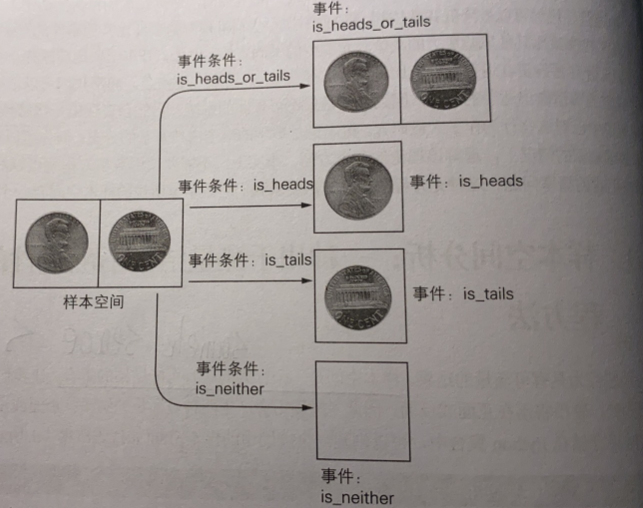


箭头代表事件条件，每个事件条件都返回“是或否”的函数，最终有4种事件可能为：正面，反面，正面或反面，既不是正面也不是反面。

在严格的数学语言中，事件指的是样本空间的所有可能的子集，包括了单个事件构成的子集，不同事件的排列组合，样本空间自身和空集。

In [ ]:
# 定义事件条件
def is_heads_or_tails(outcome): return outcome in {"Heads", "Tails"}  # outcome in {"Heads", "Tails"} 会先进行判断，返回一个True或者False的布尔值
def is_neither(outcome): return not is_heads_or_tails(outcome)  # 如果结果 outcome 在 Heads或Tails中，则进行取反，也就是not

In [ ]:
# 定义额外的事件条件
def is_heads(outcome): return outcome == "Heads"
def is_tails(outcome): return outcome == "Tails"

In [ ]:
# 定义事件检测函数
def get_matching_event(event_condition, sample_space):  # 两个参数：事件条件，样本空间
    return set([outcome for outcome in sample_space if event_condition(outcome)])  # event_condition(outcome) 其实是调用了event_condition()函数，


In [ ]:
# 推导式例子
words = ["apple", "banana", "grape", "kiwi", "orange"]
long_words = [word for word in words if len(word) >= 5]  # 对于words中的每一个word进行条件判断，将符合条件的选择出来
print(long_words)

['apple', 'banana', 'grape', 'orange']


In [ ]:
# 使用事件条件检测事件
event_conditions = [is_heads_or_tails, is_heads, is_tails, is_neither]  # 所有的事件条件，这里的列表中都是函数，所以需要使用 .__name__来输出函数的名称

for event_condition in event_conditions:
    print(f"Event condition: {event_condition.__name__}")  # 输出event_condition函数的名称
    event = get_matching_event(event_condition, sample_space)
    print(f"Event: {event}\n")

Event condition: is_heads_or_tails
Event: {'Heads', 'Tails'}

Event condition: is_heads
Event: {'Heads'}

Event condition: is_tails
Event: {'Tails'}

Event condition: is_neither
Event: set()



In [ ]:
# 计算事件概率
def compute_probability(event_condition, generic_sample_space):  # generic 通用的
    event = get_matching_event(event_condition, generic_sample_space)  # compute_probability 函数提取与输入事件条件相关联的事件，以计算其概率
    return len(event) / len(generic_sample_space)  # 事件的概率等于事件的大小除以样本空间的大小，所以一个元素的长度/整体的长度

for event_condition in event_conditions:
    prob = compute_probability(event_condition, sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

Probability of event arising from 'is_heads_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.5
Probability of event arising from 'is_tails' is 0.5
Probability of event arising from 'is_neither' is 0.0


可以发现 is_heads_or_tails 的出现的可能性是100%，而与之取反的is_neither则是0%；正面和背面的可能性都是50%。

### 有偏差硬币

有偏差硬币的正反面出现的概率是不同的。

这里假设存在着一个有偏差硬币，正面朝上的概率是反面的四倍。

In [ ]:
# 使用字典来实现
weighted_sample_space = {'Heads':4, 'Tails':1}  # 总和为5，Heads对应的值为4，则Tails对应的值为1

In [ ]:
weighted_sample_space.values()  # .values()函数会将自动中的所有的keys所对应的values提取出来

dict_values([4, 1])

In [ ]:
# 检查加权空间的大小
sample_space_size = sum(weighted_sample_space.values())
assert sample_space_size == 5  # assert 为检测条件是否为真，如果条件为真，则代码继续运行，否则会抛出异常

In [ ]:
# 抛出异常
# assert sample_space_size == 10
"""
---------------------------------------------------------------------------
AssertionError                            Traceback (most recent call last)
<ipython-input-47-be4b489b73ce> in <cell line: 2>()
      1 # 抛出异常
----> 2 assert sample_space_size == 10

AssertionError:
"""

'\n---------------------------------------------------------------------------\nAssertionError                            Traceback (most recent call last)\n<ipython-input-47-be4b489b73ce> in <cell line: 2>()\n      1 # 抛出异常\n----> 2 assert sample_space_size == 10\n\nAssertionError:\n'

采用上述方式来重新定义事件大小，每个事件都是一组结果，结果映射到权重。

In [ ]:
# 检查加权事件的大小
event = get_matching_event(is_heads_or_tails, weighted_sample_space)  # python迭代字典的键而不是键值对
event_size = sum(weighted_sample_space[outcome] for outcome in event)
assert event_size == 5

In [ ]:
# 定义广义事件概率函数
def compute_event_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    if type(generic_sample_space)  == type(set()):  # 这里将会检查generic_sample_space是否是一个集合，因为除了空集，其他的情况之下传入的是一个字典，键值对表示了事件的权重
        return len(event) / len(generic_sample_space)
    event_size = sum(generic_sample_space[outcome]
                     for outcome in event)
    return event_size / sum(generic_sample_space.values())

In [ ]:
for event_condition in event_conditions:
    prob = compute_event_probability(event_condition, weighted_sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

Probability of event arising from 'is_heads_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.8
Probability of event arising from 'is_tails' is 0.2
Probability of event arising from 'is_neither' is 0.0


## 计算非平凡概率

### 一个有四个孩子的家庭

假设一个家庭有4个孩子，孩子为男孩和女孩的概率是相同的。

首先可以构建出一个未加权的样本空间：

```
[('B', 'B', 'B', 'B'), ('B', 'B', 'B', 'G'), ('B', 'B', 'G', 'B'),
('B', 'B', 'G', 'G'), ('B', 'G', 'B', 'B'), ('B', 'G', 'B', 'G'),
('B', 'G', 'G', 'B'), ('B', 'G', 'G', 'G'), ('G', 'B', 'B', 'B'),
('G', 'B', 'B', 'G'), ('G', 'B', 'G', 'B'), ('G', 'B', 'G', 'G'),
('G', 'G', 'B', 'B'), ('G', 'G', 'B', 'G'), ('G', 'G', 'G', 'B'),
('G', 'G', 'G', 'G')]
```

重新排列：

- ('B', 'B', 'B', 'B')  # 4 boys
- ('B', 'B', 'B', 'G')  # 3 boys
- ('B', 'B', 'G', 'B')  # 3 boys
- ('B', 'B', 'G', 'G')  # 2 boys
- ('B', 'G', 'B', 'B')  # 3 boys
- ('B', 'G', 'B', 'G')  # 2 boys
- ('B', 'G', 'G', 'B')  # 2 boys
- ('B', 'G', 'G', 'G')  # 1 boys
- ('G', 'B', 'B', 'B')  # 3 boys
- ('G', 'B', 'B', 'G')  # 2 boys
- ('G', 'B', 'G', 'B')  # 2 boys
- ('G', 'B', 'G', 'G')  # 1 boys
- ('G', 'G', 'B', 'B')  # 2 boys
- ('G', 'G', 'B', 'G')  # 1 boys
- ('G', 'G', 'G', 'B')  # 1 boys
- ('G', 'G', 'G', 'G')  # 0 boys


在样本空间中，有两个男孩的情况出现了 6 次。总共有 16 种可能的情况。因此，有两个男孩的占比可以通过以下计算得出：

占比 = (有两个男孩的情况数) / (总样本空间大小) = 6 / 16 = 0.375

所以，有两个男孩的情况占比是 37.5%。

需要注意：从组合的角度来讲：
- ('G', 'G', 'B', 'G')  # 1 boys
- ('G', 'G', 'G', 'B')  # 1 boys
- ('G', 'B', 'G', 'G')  # 1 boys
- ('B', 'G', 'G', 'G')  # 1 boys

都属于“只有一个男孩”这一事件，但是事件和事件之间的权重是不一样的，比如说“没有男孩”这个事件的数量为：

- ('G', 'G', 'G', 'G')  # 0 boys

那么“只有一个男孩的可能性”其实就是“没有男孩”的可能性的四倍。

所以虽然“恰好是两个男孩”是一个组合上的描述，但是需要通过排列将所有的可能性都列出来，然后计算每一个组合事件的权重是多少。

数学计算证明：

当我们想要计算恰好有两个男孩的情况占所有可能情况的比例时，可以使用组合数学的方法来计算。

在一个家庭中，每个孩子的性别有两种可能性：男孩（B）或女孩（G）。由于每个孩子的性别是独立的，我们可以使用二项分布的概念来计算。

假设一个家庭中有 4 个孩子，我们想要知道恰好有 2 个男孩的情况。可以使用二项分布的公式来计算：

$$
P(X = k) = \binom{n}{k} \cdot p^k \cdot (1 - p)^{n - k}
$$

其中：
- $n$ 是试验次数（孩子数量）
- $k$ 是成功的次数（男孩数量）
- $p$ 是成功的概率（男孩的概率）
- $\binom{n}{k}$ 是组合数，表示从 $n$ 个试验中选择 $k$ 个成功的方式数。

在这个问题中，$n = 4$，$k = 2$，$p = 0.5$（男孩和女孩的概率相同）。所以，我们可以计算：

$$
P(X = 2) = \binom{4}{2} \cdot (0.5)^2 \cdot (1 - 0.5)^{4 - 2}
$$

$$
= 6 \cdot 0.25 \cdot 0.25 = 0.375
$$

因此，恰好有两个男孩的情况占所有可能情况的比例是 0.375，即 37.5%。这与之前通过罗列情况得出的结果是一致的。同理，恰好有两个男孩的情况所有可能性的比例也是0.375。

需要注意的是：“恰好只有两个男孩”的反命题是“恰好不止有两个男孩”，而不是“恰好只有两个女孩”，虽然“男孩”和“女孩”在日常生活中会被是做是相对称方，但是这不是数学意义上的。

In [ ]:
# 使用Python代码来计算样本空间，使用循环来打印所有的可能的结果
possible_children = ["Boy", "Girl"]  # 两种可能的性别结果
sample_space = set()

for child1 in possible_children:
    for child2 in possible_children:
        for child3 in possible_children:
            for child4 in possible_children:
                outcome = (child1, child2, child3, child4)
                sample_space.add(outcome)
sample_space

{('Boy', 'Boy', 'Boy', 'Boy'),
 ('Boy', 'Boy', 'Boy', 'Girl'),
 ('Boy', 'Boy', 'Girl', 'Boy'),
 ('Boy', 'Boy', 'Girl', 'Girl'),
 ('Boy', 'Girl', 'Boy', 'Boy'),
 ('Boy', 'Girl', 'Boy', 'Girl'),
 ('Boy', 'Girl', 'Girl', 'Boy'),
 ('Boy', 'Girl', 'Girl', 'Girl'),
 ('Girl', 'Boy', 'Boy', 'Boy'),
 ('Girl', 'Boy', 'Boy', 'Girl'),
 ('Girl', 'Boy', 'Girl', 'Boy'),
 ('Girl', 'Boy', 'Girl', 'Girl'),
 ('Girl', 'Girl', 'Boy', 'Boy'),
 ('Girl', 'Girl', 'Boy', 'Girl'),
 ('Girl', 'Girl', 'Girl', 'Boy'),
 ('Girl', 'Girl', 'Girl', 'Girl')}

In [ ]:
# 这里使用product函数来计算样本空间
from itertools import product
all_combinations = product(*(4 * [possible_children]))
assert set(all_combinations) == sample_space
all_combinations_list = list(all_combinations)

In [ ]:
# 将repeat传递到product
sample_space_efficient = set(product(possible_children, repeat = 4))
assert sample_space == sample_space_efficient

In [ ]:
# 计算两个男孩的概率
def has_two_boys(outcome): return len([child for child in outcome   # 对于outcome中的每一个元素进行遍历，便利的元素被称之为叫做child
                                       if child == "Boy"]) == 2   # 如果有child这个元素被判断为是Boy，则添加到[]中，然后计算长度，判断是==2

prob = compute_event_probability(has_two_boys, sample_space)
print(f"Probability of 2 boys is {prob}")

Probability of 2 boys is 0.375


### 骰子游戏

6个面，每个面的可能性是一样的，掷骰子6次，求结果加起来是21的概率是多少？

In [ ]:
# 首先是事件
possible_rolls = list(range(1, 7))
print(possible_rolls)

[1, 2, 3, 4, 5, 6]


In [ ]:
# 创建sample space
sample_space = set(product(possible_rolls, repeat = 6))

In [ ]:
# sample_space

In [ ]:
# 计算掷骰子总和的概率
def has_sum_of_21(outcome): return sum(outcome) == 21
prob = compute_event_probability(has_sum_of_21, sample_space)
print(f"6 rolls sum to 21 with a probability of {prob}")

6 rolls sum to 21 with a probability of 0.09284979423868313


In [ ]:
# 使用lambda表达式来计算概率
prob = compute_event_probability(lambda x : sum(x) == 21, sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)

### 使用加权样本空间计算掷骰子的概率



使用加权样本空间重新计算这个概率，需要将未加权样本空间集合转换为一个加权样本空间字典。

确定所有可能的骰子值总和，然后计算每个总和在所有可能的骰子组合中出现的次数。这些组合已经被存储在sample_space中了。

In [ ]:
from collections import defaultdict  # 该模块会返回所有键都使用默认值的字典

weighted_sample_space = defaultdict(int)   # defaultdict(int)会返回一个字典，并且将每个键的默认值都设置为0

for outcome in sample_space:
    total = sum(outcome)  # 计算6个独立的骰子的总和
    weighted_sample_space[total] += 1  # 更新求和值出现的次数

In [ ]:
# 两种非常罕见的投掷结果组合
assert weighted_sample_space[6] == 1
assert weighted_sample_space[36] == 1

In [ ]:
# 另一个较为常见的组合
num_21_combinations = weighted_sample_space[21]
print(f"There are {num_21_combinations} ways for 6 die rolls to sum to 21")

There are 4332 ways for 6 die rolls to sum to 21


投掷出21点的4322种方法 等于 投掷出21点的未加权事件的长度。

此外，weighted_sample中值的总和等于sample_space的长度。

因此，未加权和加权事件概率计算之间存在着直接联系。


当然，以下是使用表格进行加权事件和常规事件总结的示例：

| 概念           | 描述                                              | 例子                                    |
|----------------|--------------------------------------------------|----------------------------------------|
| 加权事件       | 不同事件具有不同的概率分配。                      | 抛硬币，正面的概率为 0.6，反面的概率为 0.4 |
| 常规事件       | 所有不同事件具有相等的概率分配。                  | 抛骰子，每个点数的概率都是 1/6           |
| 概率计算       | 需要根据具体的概率分配计算每个事件的概率。      | 加权事件：P(A) = 0.3, P(B) = 0.7         |
|                | 可能需要考虑事件之间的权重和概率分配。          |                                        |
|                |                                                |                                        |
| 概率计算       | 所有事件的概率相等，可以通过简单的计数得出概率。 | 常规事件：P(A) = 1/4, P(B) = 1/4         |
|                |                                                |                                        |
| 适用场景       | 当事件发生的概率不一样时，可以使用加权事件。    | 根据历史数据预测未来股票价格变化         |
|                |                                                |                                        |
|                | 当所有事件具有相同概率时，可以使用常规事件。    | 投掷骰子，掷出不同点数的概率            |

这个表格总结了加权事件和常规事件的基本概念、概率计算方法以及它们在不同情境中的适用性。这有助于更清楚地理解这两个概念及其在概率论中的角色。

在这个场景中，我们有一个六面骰子，每个面的可能性是相等的，都是 $\frac{1}{6}$。我们要投掷骰子六次，然后计算投掷结果的总和。现在我们来看看加权事件和未加权事件在这个情景中的应用：

1. **未加权事件（Equally Likely Events）**：
   未加权事件是指所有事件的概率相等，每个事件都有相同的可能性。在这个场景中，投掷骰子的每个结果都是等可能发生的，每个面都有 $\frac{1}{6}$ 的概率。因此，每个可能的投掷序列（例如1、2、3、4、5、6）都有相同的概率。

   未加权事件的概率计算可以直接通过计数得出，即有多少种可能的投掷序列使得结果的总和为21。

2. **加权事件（Weighted Events）**：
   加权事件是指不同事件有不同的概率发生。在这个场景中，我们希望投掷骰子六次，使得结果的总和为21。这是一个特定的事件，因为不同的投掷序列会产生不同的总和。由于每个面的概率相等，我们可以计算不同投掷序列的组合，找出满足总和为21的投掷序列。

   加权事件的概率计算需要考虑不同事件的概率分配，即找出使得总和为21的投掷序列的数量，并将这个数量除以总的可能的投掷序列数。

综上所述，在这个场景中，未加权事件指的是投掷六次骰子的每个可能序列的等可能性，而加权事件则指的是特定的投掷序列，使得总和为21。在这里，未加权事件是每个投掷序列的概率相等，而加权事件是特定投掷序列的概率。

In [ ]:
# 使用加权事件来进行计算
prob = compute_event_probability(lambda x: x == 21,
                                 weighted_sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)
print(f"6 rolls sum to 21 with a probability of {prob}")

6 rolls sum to 21 with a probability of 0.09284979423868313


使用加权相对于不使用加权的好处在于：能够节约内存空间。

In [ ]:
len(sample_space)

46656

In [ ]:
len(weighted_sample_space)

31

可以发现未加权的sample_space集合的元素数量是加权样本空间字典的150倍。

## 计算区间范围内的概率

区间是两个边界的中间的所有数字的集合。

In [ ]:
def is_in_interval(number, minimum, maximum):
    return minimum <= number <= maximum

In [ ]:
prob = compute_event_probability(lambda x: is_in_interval(x, 10, 21),
                                 weighted_sample_space)

print(f"Probability of interval is {prob}")

Probability of interval is 0.5446244855967078


在大约54.46%的情况之下，6次掷骰子的总和将会落入到这个区间范围内。

使用区间可以用来评估极端情况。

比如说：投硬币10次8次正面向上，这枚硬币是无偏差硬币还是存在着非平凡概率？

首先从统计学的角度来思考这个问题。

根据统计学的观点，我们可以使用置信区间的概念来评估投硬币的偏差情况。在这种情况下，我们可以使用二项分布的置信区间来估计硬币正面朝上的概率。

假设硬币正面朝上的概率为 p，那么进行 10 次投掷，出现 8 次正面的概率可以由二项分布计算得出。置信区间则可以告诉我们 p 的估计范围。

常用的方法是计算二项分布的置信区间，其中最常见的是 Wilson Score Interval（威尔逊置信区间）。这个方法能够在样本较小的情况下提供较好的估计。

假设你希望使用 95% 的置信水平来计算置信区间，可以使用统计软件或在线计算器来计算。假设投掷了 10 次，出现 8 次正面，可以得到以下的置信区间估计：

使用统计软件或计算器得到的结果可能为：
- 下界：约 0.533
- 上界：约 0.966

这意味着在 95% 的置信水平下，硬币正面朝上的真实概率可能在 0.533 到 0.966 之间。因此，尽管出现了 8 次正面，但我们不能确定硬币一定有偏差，因为置信区间包括了 0.5（公平硬币的正面朝上概率）。

总之，要得出更准确的结论，我们需要更多的数据，或者使用更高级的统计方法来评估硬币是否真的有偏差。

如果我们继续进行试验，这次进行了20次抛硬币，得到的结果为16次正面朝上

在这个情况下，我们可以继续使用置信区间的概念来重新评估硬币是否有偏差。同样，我们可以使用二项分布的置信区间来估计硬币正面朝上的概率。

假设硬币正面朝上的概率仍为 p，进行 20 次投掷，出现 16 次正面的概率可以由二项分布计算得出。同样，我们可以使用 Wilson Score Interval 或其他置信区间方法来计算置信区间。

如果使用 95% 的置信水平，计算结果可能为：
- 下界：约 0.629
- 上界：约 0.885

这意味着在 95% 的置信水平下，硬币正面朝上的真实概率可能在 0.629 到 0.885 之间。

与之前相比，这个置信区间的范围缩小了，但仍然包括了 0.5，即公平硬币的正面朝上概率。因此，虽然投掷了 16 次正面，我们仍不能确定硬币是否有偏差。

综上所述，要更准确地确定硬币是否有偏差，需要继续进行更多次数的试验，并根据得到的数据计算置信区间。如果置信区间不再包括 0.5，那么就可以有一定的信心说这个硬币可能有偏差。

In [ ]:
import scipy.stats as stats

# 输入参数
num_trials_1 = 10  # 投硬币次数
num_successes_1 = 8  # 正面朝上次数
confidence_level = 0.95  # 置信水平

# 使用二项分布计算置信区间
lower_1, upper_1 = stats.binom.interval(confidence_level, num_trials_1, num_successes_1 / num_trials_1)

print(f"对于投硬币{num_trials_1}次，正面朝上{num_successes_1}次的置信区间：")
print(f"置信区间下限：{lower_1:.4f}")
print(f"置信区间上限：{upper_1:.4f}")

# 输入参数
num_trials_2 = 20  # 投硬币次数
num_successes_2 = 16  # 正面朝上次数

# 使用二项分布计算置信区间
lower_2, upper_2 = stats.binom.interval(confidence_level, num_trials_2, num_successes_2 / num_trials_2)

print(f"对于投硬币{num_trials_2}次，正面朝上{num_successes_2}次的置信区间：")
print(f"置信区间下限：{lower_2:.4f}")
print(f"置信区间上限：{upper_2:.4f}")

对于投硬币10次，正面朝上8次的置信区间：
置信区间下限：5.0000
置信区间上限：10.0000
对于投硬币20次，正面朝上16次的置信区间：
置信区间下限：12.0000
置信区间上限：19.0000


In [ ]:
# 输入参数
num_trials = 10  # 投硬币次数
success_prob = 0.5  # 正面朝上的概率

# 计算正面朝上次数在区间 [8, 10] 内的概率
probability_8_to_10 = sum(stats.binom.pmf(k, num_trials, success_prob) for k in range(8, 11))

print(f"投硬币{num_trials}次，正面朝上次数在区间 [8, 10] 内的概率：{probability_8_to_10:.4f}")

# 输入参数
num_trials = 20  # 投硬币次数

# 计算正面朝上次数在区间 [16, 20] 内的概率
probability_16_to_20 = sum(stats.binom.pmf(k, num_trials, success_prob) for k in range(16, 21))

print(f"投硬币{num_trials}次，正面朝上次数在区间 [16, 20] 内的概率：{probability_16_to_20:.4f}")

投硬币10次，正面朝上次数在区间 [8, 10] 内的概率：0.0547
投硬币20次，正面朝上次数在区间 [16, 20] 内的概率：0.0059


In [ ]:
# 计算10次抛硬币的样本空间
def generate_coin_sample_space(num_flips = 10):
    weighted_sample_space = defaultdict(int)
    for coin_flips in product(['Heads', 'Tails'], repeat = num_flips):
        heads_count = len([outcome for outcome in coin_flips
                           if outcome == 'Heads'])
        weighted_sample_space[heads_count] += 1

    return weighted_sample_space

weighted_sample_space = generate_coin_sample_space()
print(weighted_sample_space)
assert weighted_sample_space[10] == 1
assert weighted_sample_space[9] == 10

defaultdict(<class 'int'>, {10: 1, 9: 10, 8: 45, 7: 120, 6: 210, 5: 252, 4: 210, 3: 120, 2: 45, 1: 10, 0: 1})


In [ ]:
prob = compute_event_probability(lambda x: is_in_interval(x, 8, 10),
                                 weighted_sample_space)
print(f"Probability of observing more than 7 heads is {prob}")

Probability of observing more than 7 heads is 0.0546875


In [71]:
prob = compute_event_probability(lambda x: not is_in_interval(x, 3, 7),
                                 weighted_sample_space)
print(f"Probability of ovserving more than 7 heads or 7 tails is {prob}")

# 在10次抛硬币中，大约有10%的概率会产生至少8次相同的结果

Probability of ovserving more than 7 heads or 7 tails is 0.109375


In [72]:
weighted_sample_space_20_flips = generate_coin_sample_space(num_flips = 20)
prob = compute_event_probability(lambda x: not is_in_interval(x, 5, 15),
                                 weighted_sample_space_20_flips)
print(f"Probability of observing more than 15 heads or 15 tails is {prob}")

Probability of observing more than 15 heads or 15 tails is 0.01181793212890625


可以发现，跑硬币的次数从10增加到20的时候，80%的抛硬币的的结果为正面的可能性，从10%左右下降到了1%左右。